# **MÓDULO 33 - Projeto Final de Modelos Avançados**

**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes utilizando o algoritmo de clustering K-Means. Ao final do projeto, você terá a oportunidade de consolidar seus conhecimentos em exploração de dados, pré-processamento, implementação e avaliação de modelos.

**Exploração de Dados:**

Inicie explorando o dataset fornecido, buscando entender as principais características das variáveis e a distribuição dos dados.

Realize análises descritivas, identifique padrões, e verifique a presença de valores ausentes ou inconsistências que precisem ser tratadas.

**Tratamento de Dados:**

Realize os tratamentos necessários como limpeza de dados, normalização ou padronização das variáveis, e, se necessário, a criação de variáveis derivadas.

Documente cada etapa do tratamento, explicando o motivo das escolhas feitas e como elas impactam no modelo.

**Implementação do Algoritmo K-Means:**

Aplique o algoritmo K-Means no dataset tratado. Defina o número de clusters (k).
Execute o algoritmo, ajuste os parâmetros conforme necessário, e documente o processo.

**Avaliação e Interpretação dos Resultados:**

Avalie a qualidade dos clusters gerados utilizando métricas adequadas.

Interprete os resultados, descrevendo as características de cada cluster e como eles podem ser utilizados para a segmentação de clientes.

Sugira aplicações práticas para os clusters identificados, como estratégias de marketing direcionadas ou personalização de ofertas.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

Notem que neste projeto vocês terão autonomia para criar os passos e justificar, sempre, os passos escolhidos.

In [111]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [52]:
Cliente = pd.read_csv("C:/Users/User/Downloads/Mall_Customers.csv")

In [54]:
Cliente

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [56]:
Cliente.isnull().values.any()

False

In [58]:
label_encoder = LabelEncoder()
Cliente['Gender'] = label_encoder.fit_transform(Cliente['Gender'])
print(Cliente)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]


In [68]:
Cliente = Cliente.drop('CustomerID', axis=1)

### Nesta etapa, realizei o processamento de dados faltantes ou ausentes do dataset, garantindo a integridade dos dados para análise posterior. Além disso, optei por remover a coluna CustomerID, especificamente.

In [121]:
padronizado = Cliente.copy()

In [123]:
padronização = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
padronizado[padronização] = scaler.fit_transform(Cliente[padronização])

In [125]:
padronizado

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cliente
0,1.128152,-1.424569,-1.738999,-0.434801,1
1,1.128152,-1.281035,-1.738999,1.195704,1
2,-0.886405,-1.352802,-1.700830,-1.715913,0
3,-0.886405,-1.137502,-1.700830,1.040418,2
4,-0.886405,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061,2
196,-0.886405,0.441365,2.497807,-0.861839,0
197,1.128152,-0.491602,2.497807,0.923953,1
198,1.128152,-0.491602,2.917671,-1.250054,3


#### Optei por realizar a padronização dos dados para garantir que todas as variáveis estejam em uma mesma escala, o que é fundamental para muitas técnicas de análise de dados e modelagem. Ao padronizar os valores, posso evitar problemas de escala e garantir que as variáveis sejam tratadas de forma igualitária, o que melhora a precisão e a robustez dos resultados. Além disso, a padronização ajuda a prevenir que variáveis com escalas maiores dominem o modelo, permitindo que as relações entre as variáveis sejam mais bem capturadas. Com isso, posso ter certeza de que minha base de dados está bem ajustada e pronta para ser utilizada em análises e modelos mais avançados.

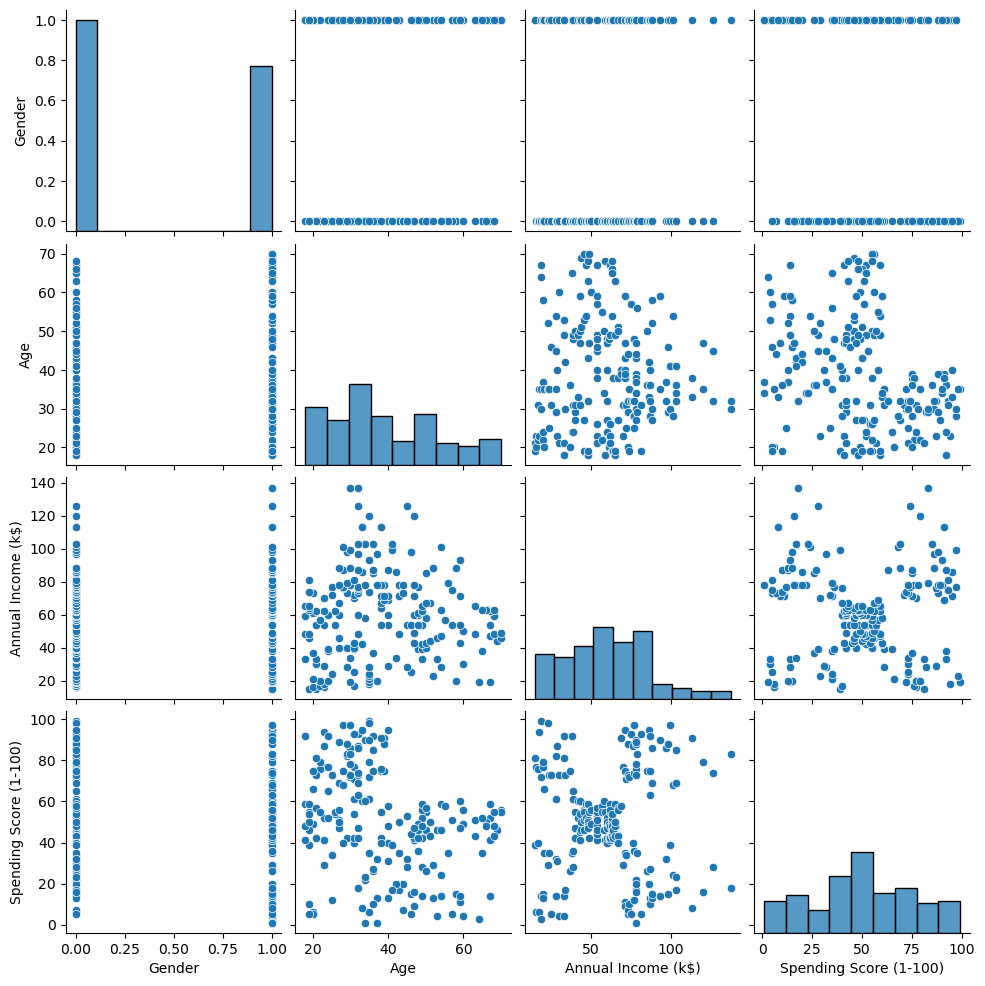

In [127]:
sns.pairplot(Cliente)

#### Aqui vimos que temos alguns padrões bem visíveis, que incluem:

- A relação entre Spending Score (1-100) e Annual Income (k$)

Esses padrões podem ser úteis para entender melhor o comportamento dos clientes e identificar oportunidades de melhoria.



In [129]:
valores_k = []
inercias = []

for i in range(1,11):
    Kmeans = KMeans(n_clusters=i, random_state=0).fit(padronizado)
    valores_k.append(i)
    inercias.append(Kmeans.inertia_)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

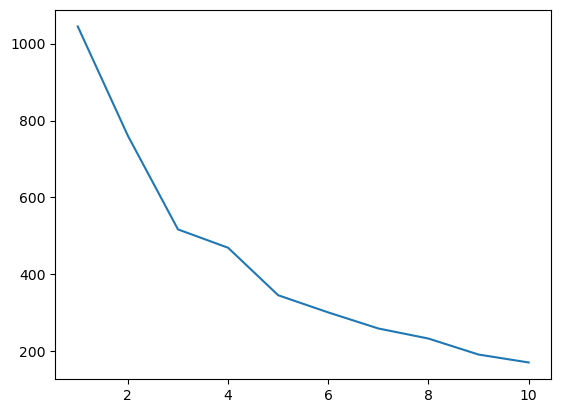

In [133]:
fig, ax = plt.subplots()

ax.plot(valores_k,inercias)
plt.show()

#### Nesse estudo, utilizei o Método do Cotovelo para determinar o número ótimo de clusters necessários para a análise. Após analisar o gráfico gerado pelo método, observei que o ponto de inflexão, ou "cotovelo", ocorre quando são utilizados 4 clusters. Com base nessa análise, decidi que 4 clusters seriam suficientes para capturar as principais características e padrões presentes nos dados, permitindo uma interpretação mais clara e precisa dos resultados.

In [136]:
kmeans_Cliente = KMeans (n_clusters=4, n_init=10, random_state=42)
kmeans_Cliente.fit(padronizado)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10, random_state=42)

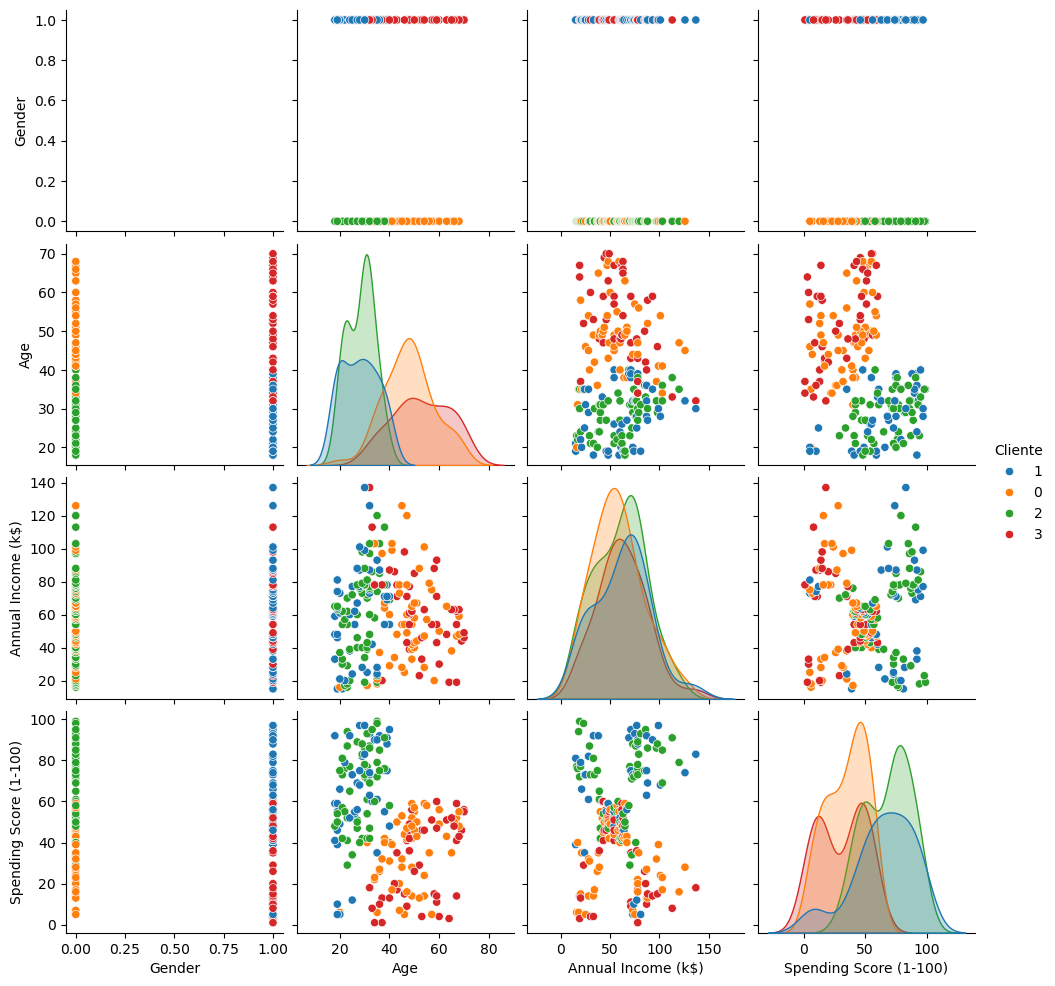

In [143]:
Cliente['Cliente'] = kmeans_Cliente.labels_.astype('str')
sns.pairplot(Cliente, hue = 'Cliente')

#### A análise visual do gráfico revelou que alguns grupos estão bem definidos, enquanto outros estão mais dispersos. Sem a utilização de cores no gráfico, seria desafiador identificar esses padrões apenas visualmente. No entanto, com o uso do K-means, foi possível obter uma visão clara e detalhada da estrutura dos dados, permitindo uma melhor compreensão dos agrupamentos e das relações entre as variáveis.